In [1]:
from functions.svd import SVD
from functions.pca import PCA
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]
y_train = y_train[masktrain]
X_test = X_test[masktest]
y_test = y_test[masktest]

X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  



11490434/11490434 [==============================] - 1s 0us/step


## Apply SVD

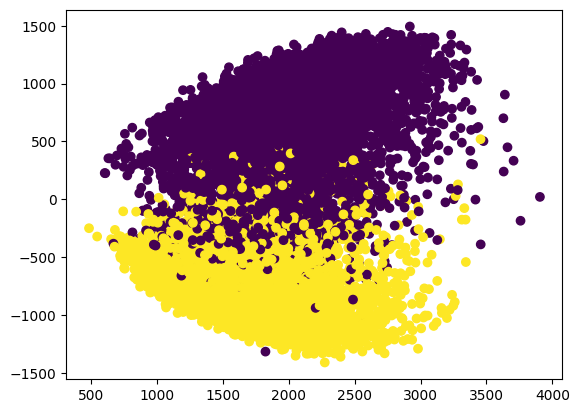

In [7]:
svd=SVD(2)
reduced_x_train=svd.fit_transform(X_train)
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [8]:
reduced_x_test=svd.fit_transform(X_test)

In [9]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

In [10]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[942  38]
 [ 40 934]]
Accuracy:  0.9600818833162743


this reduced ways has a little impact in the new logistic regression but it is explain by the loss information in the dimession reduction

## Apply PCA

In [2]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
X_train = X_train[masktrain]/255.0
y_train = y_train[masktrain]
X_test = X_test[masktest]/255.0
y_test = y_test[masktest]
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data
pca.fit(X_train)
# transform the data using the PCA object
reduced_x_train = pca.transform(X_train)
print(reduced_x_train.shape)
reduced_x_train = np.real(reduced_x_train)


(11774, 2)


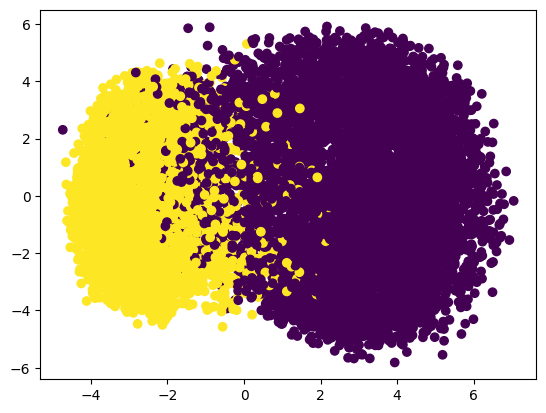

In [3]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [4]:
# pca.fit(X_test)
reduced_x_test = pca.transform(X_test)
print(reduced_x_test.shape)
reduced_x_test = np.real(reduced_x_test)
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

(1954, 2)
[[936  44]
 [ 50 924]]
Accuracy:  0.9518935516888434


The accuracy could seen affected by the loss information when we had to transdorm the pca reduced data in to real, because its output was complex numbers, already the new data describe good de information and de the accruracy is acceptable